<a href="https://colab.research.google.com/github/brandonthimmesch/IMSE541/blob/main/SQC_Chap_6_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brandon Thimmesch

IMSE 541 - Chap 6 HW

13 November 2022

In [13]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import scipy.stats
from scipy import stats

In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Ex 6.8
A high-voltage power supply should have a nominal
output voltage of 350 V. A sample of four units is
selected each day and tested for process-control purposes. The data shown in Table 6E.3 give the difference between the observed reading on each unit and
the nominal voltage times ten; that is,
xi = 10*(observed voltage on unit i - 350)

(a) Set up x bar and R charts on this process. Is the
process in statistical control?

(b) If specifications are at 350 V ± 5 V, what can you
say about process capability?

(c) Is there evidence to support the claim that voltage is normally distributed?

In [3]:
# Ex 6.8 - reading in data
data68 = pd.read_csv('drive/My Drive/Colab Notebooks/SQC/SQC_Chap6HW_Ex_6.8_data.csv', sep=',', na_values=".")
data68

,Sample number,x1,x2,x3,x4
0,1,6,9,10,15
1,2,10,4,6,11
2,3,7,8,10,5
3,4,8,9,6,13
4,5,9,10,7,13
5,6,12,11,10,10
6,7,16,10,8,9
7,8,7,5,10,4
8,9,9,7,8,12
9,10,15,16,10,13


In [4]:
df1 = [data68[['x1','x2','x3','x4']]]
df1

[    x1  x2  x3  x4
 0    6   9  10  15
 1   10   4   6  11
 2    7   8  10   5
 3    8   9   6  13
 4    9  10   7  13
 5   12  11  10  10
 6   16  10   8   9
 7    7   5  10   4
 8    9   7   8  12
 9   15  16  10  13
 10   8  12  14  16
 11   6  13   9  11
 12  16   9  13  15
 13   7  13  10  12
 14  11   7  10  16
 15  15  10  11  14
 16   9   8  12  10
 17  15   7  10  11
 18   8   6   9  12
 19  13  14  11  15]

In [5]:
# this np.reshape convert the list dataI into the proper subgroup and m=20
x=np.reshape(df1, (20,4))
x

array([[ 6,  9, 10, 15],
       [10,  4,  6, 11],
       [ 7,  8, 10,  5],
       [ 8,  9,  6, 13],
       [ 9, 10,  7, 13],
       [12, 11, 10, 10],
       [16, 10,  8,  9],
       [ 7,  5, 10,  4],
       [ 9,  7,  8, 12],
       [15, 16, 10, 13],
       [ 8, 12, 14, 16],
       [ 6, 13,  9, 11],
       [16,  9, 13, 15],
       [ 7, 13, 10, 12],
       [11,  7, 10, 16],
       [15, 10, 11, 14],
       [ 9,  8, 12, 10],
       [15,  7, 10, 11],
       [ 8,  6,  9, 12],
       [13, 14, 11, 15]])

In [6]:
# Define list variable for groups means
x_bar = []

# Define list variable for groups ranges
r = [] 

In [7]:
# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
for group in x:
    x_bar.append(group.mean())
    r.append(group.max() - group.min())
#print(x_bar)
#print(r)
m=len(x_bar)
print('points in x, ', m)

points in x,  20


# Ex 6.8 (a)

[Text(0, 0.5, 'Range'), Text(0.5, 0, 'Group')]

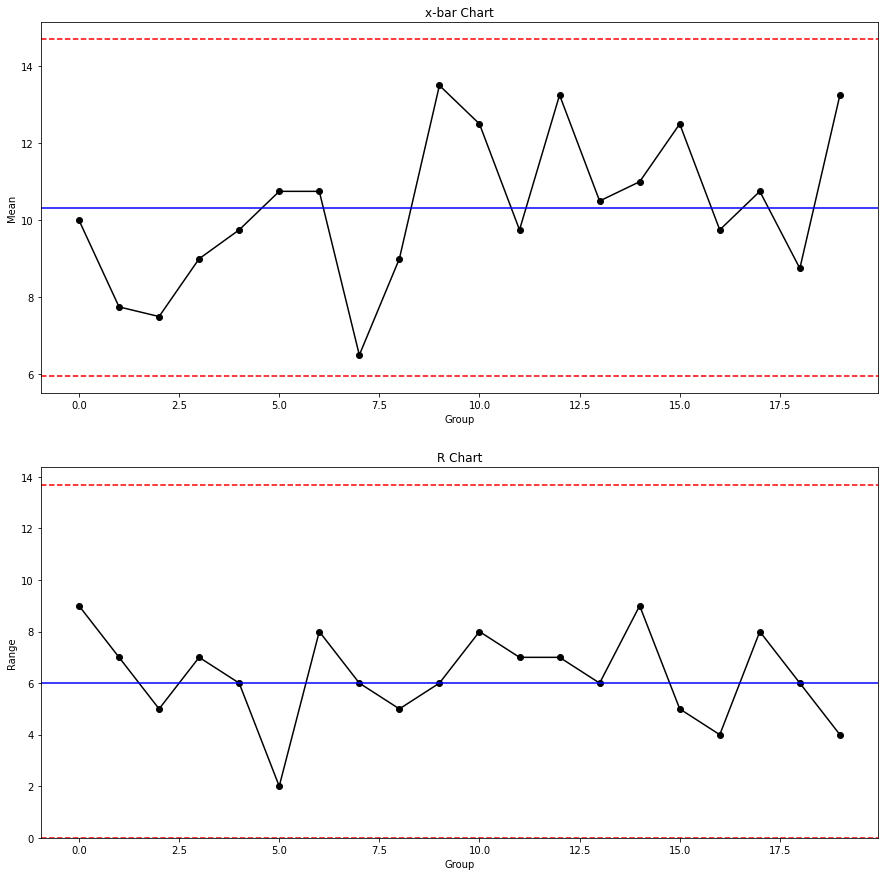

In [8]:
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart
# Chart parameters A2, D3, and D4 see the ref for other sample size
A2=0.729 #n=4
D3=0     #n=4
D4=2.282 #n=4

axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# R chart
axs[1].plot(r, linestyle='-', marker='o', color='black')
axs[1].axhline((D4*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((D3*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(r)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart')
axs[1].set(xlabel='Group', ylabel='Range')

All points are within control limits which means that the process is within statistical control.

# Ex 6.8 (b)

In [9]:
# Validate points out of control limits for x-bar chart
i = 0
control = True
for group in x_bar:
    if group > statistics.mean(x_bar)+A2*statistics.mean(r) or group < statistics.mean(x_bar)-A2*statistics.mean(r):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.


In [10]:
# Validate points out of control limits for R chart
i = 0
control = True
for group in r:
    if group > D4*statistics.mean(r):
        print('Group', i, 'out of range cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.


Since all observed samples are within control limits, the process is capable of producing quality products that meet specifications within tolerance.

# Ex 6.8 (c)

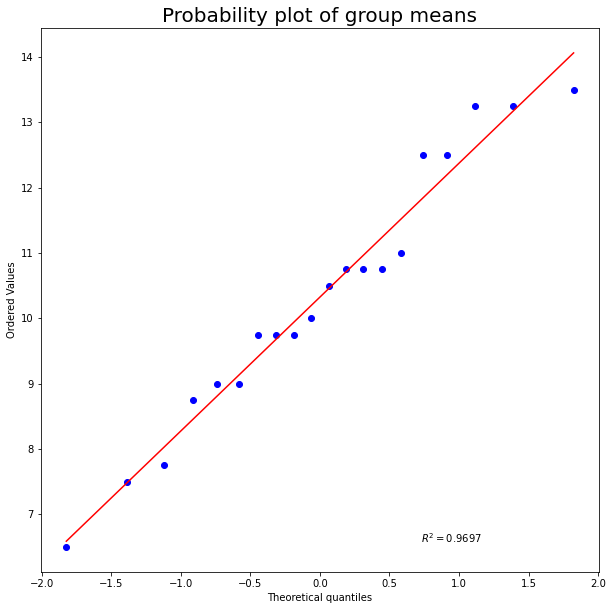

In [19]:
# normal check

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(x_bar, plot= plt, rvalue= True)
ax.set_title("Probability plot of group means", fontsize= 20)
ax.set

plt.show()

All observed samples are within control limits. Also the above probability plot passes the fat pencil test, meaning that normality can be assumed. There is no evidence to indicate that voltage is not normallly distributed.